<h1 style="text-align:center;color:#fff">Image Processing Course Project</h1>

**IMPORTING ALL THE REQUIRED LIBRARIES :**

In [79]:
import cv2
import matplotlib.pyplot as plt
import scipy.io
import os,sys
import pandas as pd
import numpy as np
import pickle
from scipy import ndimage,misc
from sklearn.metrics import average_precision_score
from skimage.metrics import peak_signal_noise_ratio as psnr
import random
import plotly.express as px

**Extracting Images From the Dataset :**

In [21]:
path = "salt_pepper/"
data = {"real" : [] , "noise" : []}
ground_truth = os.path.join(path,"Ground_truth")
noise = os.path.join(path,"Noisy_folder")
real_files = sorted(os.listdir(ground_truth))
noise_files = sorted(os.listdir(noise))
for real_file,noise_file in zip(real_files,noise_files):
    gt_filepath = os.path.join(ground_truth,real_file)
    noisy_filepath = os.path.join(noise,noise_file)
    data["real"].append(gt_filepath)
    data["noise"].append(noisy_filepath)
df = pd.DataFrame(data)
df.shape

(300, 2)

__NOISE REDUCTION OF SALT AND PEPPER NOISE :__

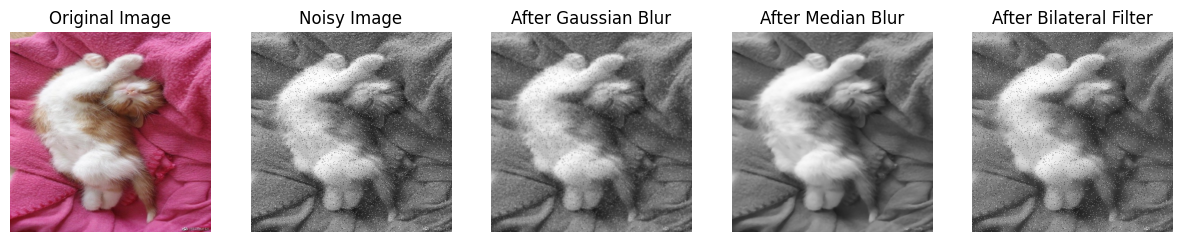

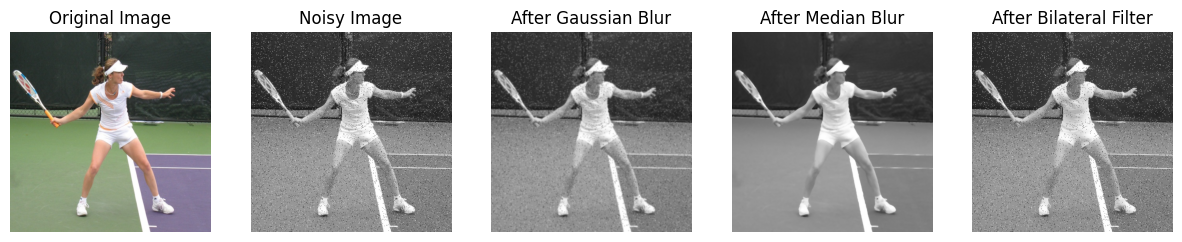

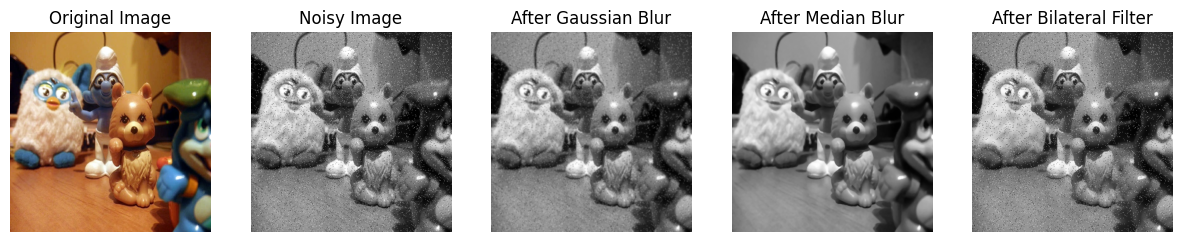

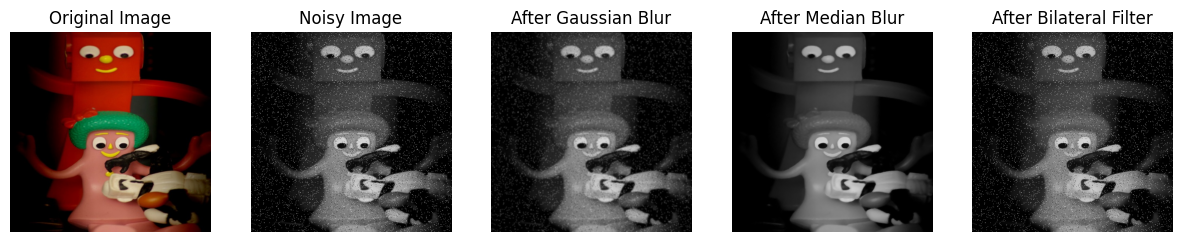

In [33]:
def noise_reduction(img):
    return cv2.medianBlur(img,5)
def noise_red_gaussian(img):
    return cv2.GaussianBlur(img,(5,5),0)
def bilateral_noise_red(img):
    return cv2.bilateralFilter(img,15,75,75)
def compare_images(original, noisy, cleaned_g,cleaned_m,cleaned_b):
    fig, axes = plt.subplots(1, 5, figsize=(15, 5))
    axes[0].imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    axes[0].set_title('Original Image')
    axes[0].axis('off')
    axes[1].imshow(cv2.cvtColor(noisy, cv2.COLOR_BGR2RGB))
    axes[1].set_title('Noisy Image')
    axes[1].axis('off')
    axes[2].imshow(cv2.cvtColor(cleaned_g, cv2.COLOR_BGR2RGB))
    axes[2].set_title('After Gaussian Blur')
    axes[2].axis('off')
    axes[3].imshow(cv2.cvtColor(cleaned_m, cv2.COLOR_BGR2RGB))
    axes[3].set_title('After Median Blur')
    axes[3].axis('off')
    axes[4].imshow(cv2.cvtColor(cleaned_b, cv2.COLOR_BGR2RGB))
    axes[4].set_title('After Bilateral Filter')
    axes[4].axis('off')
    plt.show()
psnr_val = {"Gaussian Blur" : [],"Median Blur" : [],"Bilateral Filter":[]}
for i in range(len(df)):
    clean_img = cv2.imread(df['real'][i])
    noise_img = cv2.imread(df['noise'][i])
    reduced_image_g = noise_red_gaussian(noise_img)
    reduced_image_m = noise_reduction(noise_img)
    reduced_image_b = bilateral_noise_red(noise_img)
    psnr_val["Gaussian Blur"].append(psnr(clean_img,reduced_image_g))
    psnr_val["Median Blur"].append(psnr(clean_img,reduced_image_m))
    psnr_val["Bilateral Filter"].append(psnr(clean_img,reduced_image_b))
for i in range(4):
    clean_img = cv2.imread(df['real'][i])
    noise_img = cv2.imread(df['noise'][i])
    reduced_image_g = noise_red_gaussian(noise_img)
    reduced_image_m = noise_reduction(noise_img)
    reduced_image_b = bilateral_noise_red(noise_img)
    compare_images(clean_img,noise_img,reduced_image_g,reduced_image_m,reduced_image_b)

+ We Can Conclude from the above results that __Median Blur__ works good for noise reduction of _Salt and Pepper Noise_.

**Converting the PSNR values dictionary into a _Pandas dataframe_ :**

In [23]:
psnr_df = pd.DataFrame(psnr_val)

In [25]:
psnr_df

,Gaussian Blur,Median Blur,Bilateral Filter
0,16.407948,16.522147,14.532188
1,22.649877,23.499060,17.491539
2,15.769105,15.933047,14.067429
3,16.578303,16.956021,14.028988
4,13.574221,13.643274,12.502095
...,...,...,...
295,15.185788,15.363702,13.536080
296,16.350639,16.472730,14.525230
297,16.827534,16.284054,15.677767
298,24.435237,26.089081,17.679399


__Calculating Average of Every Filter's PSNR values and storing the values in a _Pandas Dataframe_ :__

In [28]:
avg_dict = {"Gaussian":[],"Median":[],"Bilateral":[]}

In [29]:
avg_dict["Gaussian"].append(psnr_df["Gaussian Blur"].mean())
avg_dict["Median"].append(psnr_df["Median Blur"].mean())
avg_dict["Bilateral"].append(psnr_df["Bilateral Fil"].mean())

In [31]:
df2 = pd.DataFrame(avg_dict)

In [35]:
df2

,Gaussian,Median,Bilateral
0,19.778268,20.277837,16.024855


__Ploting a Line chart of the average _PSNR_ values with respect to their filters using _plotly.express_ :__

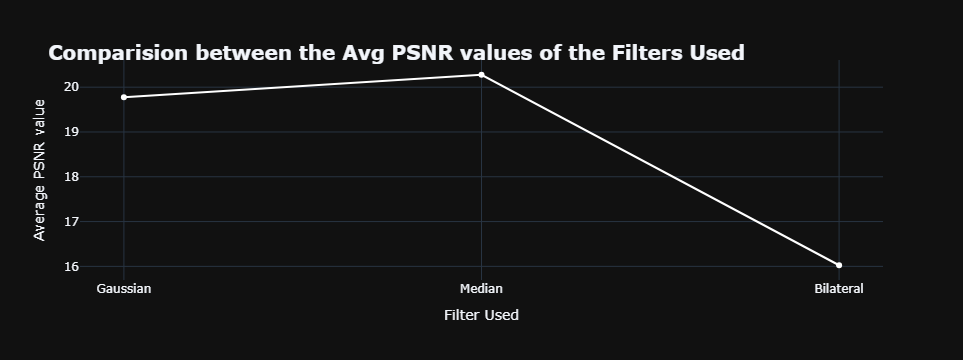

In [78]:
Y = [i[0] for i in avg_dict.values()]
X = avg_dict.keys()
fig = px.line(x=X,y=Y,markers=True,template="plotly_dark")
fig.update_layout(xaxis_title="Filter Used",yaxis_title="Average PSNR value")
fig.update_layout(
    title=dict(text="Comparision between the Avg PSNR values of the Filters Used", font=dict(size=20,weight="bold"), automargin=True,yref="paper")
)
fig.update_traces(line_color='#fff', line_width=2)

#### Conclusion :
* As we know that the higher the __Peak Signal to Noise Ratio__ the corresponding image is filtered in more efficient way.
* From the above results __Median Blur__ has the __high PSNR value__ so it works more efficiently with Salt and Pepper Noise.

#### Authors :
+ N.TEJA (B221046CS)
+ KANDUKURI KEERTHAN DHANUNJAI (B220347CS)
+ BHUKYA PRASHANTH (B220226CS)